In [3]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=0fccb68a8fd2433eed4eae1e71f8a8d62f0f5bca00344f949550b9a13b2178b9
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [1]:
!pip install textblob matplotlib

In [4]:
import re
import regex
from googleapiclient.discovery import build
from google.colab import userdata
from googletrans import Translator

In [5]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [6]:
translator = Translator()

In [7]:
# getting video_id from youtube link
video_url = input("Enter the YouTube Link : ")
match = re.search(r"(?:v=|youtu\.be/)([a-zA-Z0-9_-]{11})", video_url)
video_id = match.group(1)
print("Video Id : ",video_id)

Enter the YouTube Link : https://www.youtube.com/watch?v=qP55pKEbiKk&list=RDqP55pKEbiKk&start_radio=1&ab_channel=VocalsLyrics
Video Id :  qP55pKEbiKk


In [8]:
# remove emojis
def remove_emojis(text):
  emoji_pattern = regex.compile(r'[\p{Emoji}\p{Extended_Pictographic}]', flags=regex.UNICODE)
  return emoji_pattern.sub('', text)

In [9]:
# is_hindi
def is_hindi(text):
  return bool(re.search(r'[\u0900-\u097F]', text))

In [10]:
#convert hindi comment into higlish
def hindi_to_hinglish(text):
  try:
    detection = translator.detect(text)
    if detection.lang == 'hi':
      translit = translator.translate(text, src='hi', dest='en')
      return translit.text
    else:
      return text
  except:
    return text

In [11]:
# fetching YouTube Comments

YT_APIKEY = userdata.get('YT_APIKEY')
def get_comments(video_id,YT_APIKEY):
  youtube = build('youtube','v3',developerKey = YT_APIKEY)
  comments = []
  response = youtube.commentThreads().list(
      part = "snippet",
      videoId = video_id,
      textFormat = "plainText",
      maxResults = 100
  ).execute()

  while(response):
    for item in response['items']:
      comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
      comment = remove_emojis(comment)              # remove emojis
      #comment = hindi_to_hinglish(comment)          # hindi to hinglish
      comments.append(comment)
    if 'nextPageToken' in response:
      response = youtube.commentThreads().list(
          part="snippet",
          videoId=video_id,
          pageToken=response['nextPageToken'],
          maxResults=100
        ).execute()
    else:
      break
  return comments
video_comments = get_comments(video_id,YT_APIKEY)
print("Done")


Done


In [12]:
video_comments

['Comment Radhe Radhe...\n\n\nThank You Soo Much Guys For Listening, hope you guys enjoy to listen my music.\r\nLeave A Like And Subscribe For Daily Awesome Videos Like This.\r\n\r\n\r\nrolex bgm - https://youtu.be/ReyQcNKcQJ?si=tgwNgOjQLgfuGDR\r\nVikram Soundtrack - https://youtu.be/IECUPCSqbg?feature=...\r\nLofi D songs mashup - https://youtube.com/playlist?list=PLl...\r\nFollow me on :\r\nInstagram : https://www.instagram.com/vocals_lyri...',
 'Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe

In [13]:
len(video_comments)

984

In [14]:
# get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

In [17]:
#categorize comments
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in video_comments:
    sentiment = get_sentiment(comment)
    if sentiment == "Positive":
        positive_comments.append(comment)
    elif sentiment == "Negative":
        negative_comments.append(comment)
    else:
        neutral_comments.append(comment)

In [21]:
len(positive_comments)

131

In [18]:
positive_comments

['Comment Radhe Radhe...\n\n\nThank You Soo Much Guys For Listening, hope you guys enjoy to listen my music.\r\nLeave A Like And Subscribe For Daily Awesome Videos Like This.\r\n\r\n\r\nrolex bgm - https://youtu.be/ReyQcNKcQJ?si=tgwNgOjQLgfuGDR\r\nVikram Soundtrack - https://youtu.be/IECUPCSqbg?feature=...\r\nLofi D songs mashup - https://youtube.com/playlist?list=PLl...\r\nFollow me on :\r\nInstagram : https://www.instagram.com/vocals_lyri...',
 'I Love you Radha Krishna ',
 'i have neck issue and boards is on the way. unable to focus plus been going hospital for weeks now, its tiring but listening to krishna helps me calm. hey krishna help me recover soon and do good in exams. hare krishna, radhe radhe.',
 'I am crying now I remember my loved on my brother he die ',
 'Listening this song in th Summer vacations \nMahi-You are doing great job,Go ahead and achiev ur dreams-ur target,You krishna Kanhaiya is with u trust him,trust his process \nYou have achieved much this year,Touchwood \

In [22]:
len(negative_comments)

25

In [19]:
negative_comments

['Ye song sunkar mujhe bahut yaad aati hai mere pagla ki ',
 'Koi problem ho to me ye song sunti hu fir mere har sawwal ka jawab mil jata he <br>RadheRadhe',
 'BHAGAVAN SHRI KRUSHNA MERE PARAM MITRA OUR HAM INAKE PARAM BHAKTA HAI  MERE LIYE VOH SABAKUCHA HAI ,,,,, BOLO RADHE,,,, RADHE ',
 'Song volume down and up',
 'Bhot achalgta he ye song suneke bad That is called sukun',
 'Mere ko',
 'I am feeling soo bad now I don&;t know what to do.. ',
 'Mere Radha krishna',
 'IAM  crayin this is song sing,,, IAM so so sad man  because we are poor family ,,,',
 'Mere se to suna hi nhi ja rha me nhi  radhe radhe ',
 'Crying  with lots of overthinking and study ........ ',
 'Mere ko ',
 'Sabd nhi  h mere pass  m kon huujhko nhi pta bs bs sab radhe radhe har jgh radhe radhe har pal radhe radhe har ehsaas or ek ek saas radhe radhe',
 'Meri maa ke ilawa mere pass koi Nehi hai isaliye jab Hume koi v problems ho ya na bhi ho main',
 'Sa and sorry ',
 'Just how fast the Night changes.<br>Expectations ch

In [23]:
len(neutral_comments)

828

In [20]:
neutral_comments

['Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe Radhe RadheRadhe Radhe Radhe Radhe Radhe Radhe Radhe R

In [15]:
# analyze sentiment
sentiments = [get_sentiment(comment) for comment in video_comments]

positive_count = sentiments.count("Positive")
negative_count = sentiments.count("Negative")
neutral_count = sentiments.count("Neutral")
total_count = len(sentiments)

positive_percent = round((positive_count / total_count) * 100, 2)
negative_percent = round((negative_count / total_count) * 100, 2)
neutral_percent = round((neutral_count / total_count) * 100, 2)

print(f"Positive: {positive_percent}%, Negative: {negative_percent}%, Neutral: {neutral_percent}%")



Positive: 13.31%, Negative: 2.54%, Neutral: 84.15%


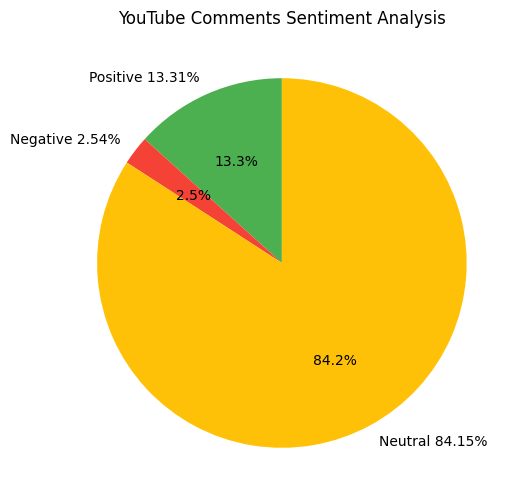

In [16]:
#pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percent, negative_percent, neutral_percent]
colors = ['#4CAF50', '#F44336', '#FFC107']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=[f"{l} {s}%" for l, s in zip(labels, sizes)], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("YouTube Comments Sentiment Analysis")
plt.show()

In [24]:
# build summerizer by using gemini-1.5-flash
!pip install -q google-generativeai

In [25]:
import google.generativeai as genai

In [28]:
gemini_api_key = userdata.get('gemini_api_key')
genai.configure(api_key=gemini_api_key)

model = genai.GenerativeModel("gemini-1.5-flash")


def summarize_sentiments(comments_list, category):
  if not comments_list:
    return "No comments found"
  prompt = f"""You are a helpful assistant. Summarize the following YouTube comments into exactly 7 bullet points. These are {category.lower()} comments, so focus only on their tone and key themes. Comments:{comments_list}"""
  response = model.generate_content(prompt)
  return response

positive_summary = summarize_sentiments(positive_comments, "Positive")
negative_summary = summarize_sentiments(negative_comments, "Negative")
neutral_summary = summarize_sentiments(neutral_comments, "Neutral")



In [33]:
print("Positive Summary: \n")
print(positive_summary.text)

Positive Summary: 

* Overwhelming appreciation for the song and its calming effect.
* The song evokes strong emotions, including joy, peace, and even tears, prompting listeners to reflect on love and loss.
* Many listeners find the music helpful for relaxation and stress relief, especially during difficult times (exams, illness, personal problems).
* The song is praised for its beauty, sweetness, and the pure love it represents (Radha Krishna).
*  The comments frequently use the phrases "Radhe Radhe" and "Hare Krishna," indicating a strong connection to the devotional aspect of the song.
*  Listeners express a desire for more content similar to the shared song.
* The creator's work is widely lauded, with many expressing gratitude for the music.



In [34]:
print("Negative Summary: \n")
print(negative_summary.text)

Negative Summary: 

* **Overwhelming sadness and despair:** Many commenters express intense sadness, crying, and feelings of hopelessness, often linking these emotions to personal struggles and loss.

* **Nostalgia and longing:** Several comments associate the song with painful memories, particularly of lost loved ones or past relationships.

* **Seeking solace and comfort:**  The song is repeatedly described as a source of comfort and peace, particularly in times of distress and uncertainty.  The repetition of "Radhe Radhe" highlights this spiritual seeking.

* **Personal struggles and vulnerability:** Commenters reveal deeply personal struggles, including poverty, relationship problems, and existential questions about love and life's meaning.

* **Spiritual yearning and questioning:** The song's connection to Krishna and Radha evokes spiritual reflections and questions about faith, love, and the nature of relationships, often expressing disillusionment.

* **Volume and sound issues:*

In [35]:
print("Neutral Summary: \n")
print(neutral_summary.text)

Neutral Summary: 

* Overwhelming positive sentiment towards the song and the divine couple Radha Krishna, frequently expressed through repeated exclamations of "Radhe Radhe."

* Strong emotional responses to the song, including feelings of peace, solace, and even tears.  Many commenters describe the music as therapeutic.

* Personal anecdotes shared by commenters about their connection to the song and its impact on their lives, often in times of distress or hardship.

* Frequent expressions of devotion and faith in Radha Krishna.

* A sense of community among listeners, indicated by questions like "Who else is listening?" and requests for others to like comments.

* Several comments mention seeking spiritual growth or solace through the music, transcending religious boundaries.

*  A few comments express personal struggles and use the song as a source of comfort.

